In [14]:
import pandas as pd
import numpy as np

In [15]:
import requests
from bs4 import BeautifulSoup

In [3]:
# def find_text(element, attribute=None, value=None):
#     try:
#         if attribute is None:
#             return element.text.strip()
#         elif value is None:
#             return element.find(attribute).text.strip()
#         else:
#             return element.find(attribute, value=value).text.strip()
#     except AttributeError:
#         return np.nan

# for i in reviews:
#     name.append(find_text(i.find('span', itemprop='name')))
#     review_title.append(find_text(i.find('h2'), attribute='text', value='"'))
#     rating.append(find_text(i.find('span', itemprop='ratingValue')))
#     traveller_type.append(find_text(i.find_all('td', class_='review-value')[0]))
#     seat_type.append(find_text(i.find_all('td', class_='review-value')[1]))
#     route.append(find_text(i.find_all('td', class_='review-value')[2]))
#     month_of_flying.append(find_text(i.find_all('td', class_='review-value')[3]))
#     verified_review.append(find_text(i.find('em')))
#     review_content.append(find_text(i.find('div', class_="text_content", itemprop="reviewBody")))

In [5]:
reviews_df = pd.DataFrame()
for k in range(1, 359):
  url = f'https://www.airlinequality.com/airline-reviews/british-airways/page/{k}/'
  response = requests.get(url).text
  soup = BeautifulSoup(response, 'lxml')
  reviews = soup.find_all('article', itemprop = 'review')

  name = []
  review_title = []
  rating = []
  traveller_type = []
  seat_type =[]
  route = []
  month_of_flying = []
  verified_review = []
  review_content = []

  for i in reviews:
    try:
      try:
        name.append(i.find('span', itemprop='name').text.strip())
      except:
        name.append(np.nan)
      try:
        review_title.append(i.find('h2').text.replace('"',''))
      except:
        review_title.append(np.nan)
      try:
        rating.append(i.find('span', itemprop='ratingValue').text)
      except:
        rating.append(np.nan)
      try:
        traveller_type.append(i.find_all('td', class_ = 'review-value')[0].text)
      except:
        traveller_type.append(np.nan)
      try:
        seat_type.append(i.find_all('td', class_ = 'review-value')[1].text)
      except:
        seat_type.append(np.nan)
      try:
        route.append(i.find_all('td', class_ = 'review-value')[2].text)
      except:
        route.append(np.nan)
      try:
        month_of_flying.append(i.find_all('td', class_ = 'review-value')[3].text)
      except:
        month_of_flying.append(np.nan)
      try:
        verified_review.append(i.find('em').text)
      except:
        verified_review.append(np.nan)
      try:
        review_content.append(i.find('div', class_ = "text_content", itemprop = "reviewBody").text.replace('Trip Verified', '').replace('Not Verified','').replace('✅', '').replace('|','').strip())
      except:
        review_content.append(np.nan)
    except:
      pass

  data = {'Passanger_Name': name, 'Flying_month':month_of_flying,'Route':route,'Rating':rating,'Verified':verified_review, 'Review_title': review_title,
          'Review_content':review_content,'Traveller_type':traveller_type, 'Class':seat_type}
  df = pd.DataFrame(data)
  reviews_df = pd.concat([reviews_df, df], ignore_index = True)
reviews_df.to_csv('British_Airways_Reviews.csv', index = False)
reviews_df.sample(5)


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc = rc)

In [16]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/British_Airways_Reviews.csv')

# Visualization

In [48]:
# !pip install nltk --quiet
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'A320'),
  Text(1, 0, 'Economy Class'),
  Text(2, 0, 'Couple Leisure'),
  Text(3, 0, 'Solo Leisure'),
  Text(4, 0, 'Business Class'),
  Text(5, 0, 'Boeing 777'),
  Text(6, 0, 'Business'),
  Text(7, 0, 'Boeing 747-400'),
  Text(8, 0, 'A380'),
  Text(9, 0, 'Family Leisure')])

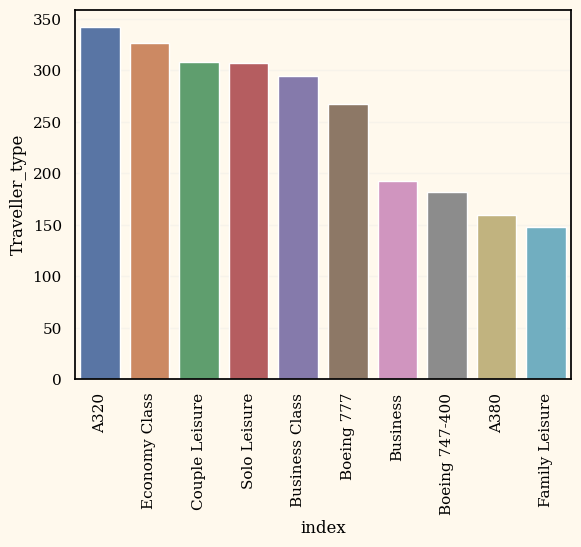

In [25]:
traveller_type = df.Traveller_type.value_counts().reset_index().head(10)
sns.barplot(data = traveller_type, x = 'index', y = 'Traveller_type')
plt.xticks(rotation = 90)

In [144]:
df['Rating'].mean()

4.79048951048951

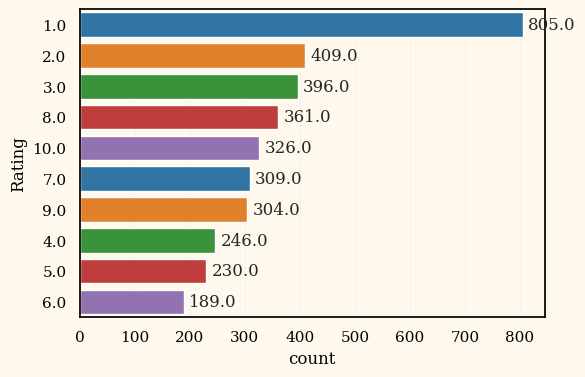

In [158]:
plt.figure(figsize =(6,4))
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
ax = sns.countplot(data = df, y = 'Rating', order = df['Rating'].value_counts().index, palette = custom_palette)
for p in ax.patches:
    count = p.get_width()
    ax.annotate(count, (count + 10, p.get_y() + p.get_height() / 2), va='center')

In [150]:
df.shape

(3580, 11)

Text(0.5, 1.0, 'Percent of Verified Review')

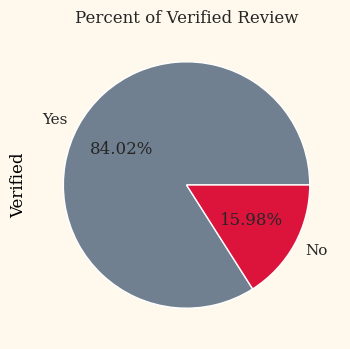

In [149]:
plt.figure(figsize = (6,4))
df.Verified.value_counts().plot(kind = 'pie', autopct = '%.2f%%', colors = ['slategrey','crimson'], labels = ['Yes','No'])
plt.title('Percent of Verified Review')

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

In [51]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [53]:
def text_transform(text):
  y = []
  text = text.lower() # 1st step
  text = nltk.word_tokenize(text) # 2nd step
  for i in text:# 3 step
      if i.isalnum():
        y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  text = y[:]
  return " ".join(text)

In [55]:
df.Review_content[0]

'The airline lost my luggage and was absolutely awful throughout the entire trip. They gave me no updates, their website sucks, and it was nearly impossible to get someone on the phone. They finally delivered my luggage to my hotel after i had left to go back to the US, 5 days after I told them to ship it back to the US. Now, I’ve been calling everyday begging them to get my bag back to me. They appease me on the phone, tell me they’re fixing it, but nothing changes. The hotel can’t get in touch with them and they haven’t even tried to pick to bag back up. Several times, when I called I got a message saying they were not answering due to too many complaints and calls and to “call back later”.'

In [56]:
text_transform(df.Review_content[0])

'airlin lost luggag absolut aw throughout entir trip gave updat websit suck nearli imposs get someon phone final deliv luggag hotel left go back us 5 day told ship back us call everyday beg get bag back appeas phone tell fix noth chang hotel get touch even tri pick bag back sever time call got messag say answer due mani complaint call call back later'

In [57]:
df['transformed_text'] = df['Review_content'].apply(text_transform)

Text(0.5, 1.0, 'Word Cloud of Descriptive Review')

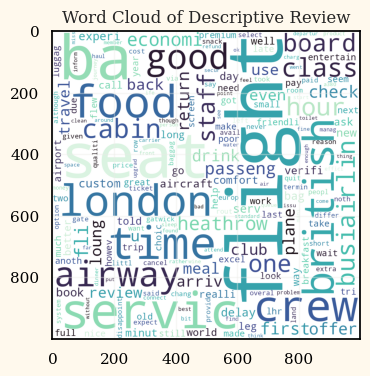

In [164]:
plt.figure(figsize = (9,4))
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color = 'white',collocations = False, colormap='mako')
cloud = wc.generate(df['transformed_text'].str.cat(sep = ' '))
plt.imshow(cloud)
plt.title("Word Cloud of Descriptive Review")
# plt.axis('off')

In [126]:
df['title_transform'] = df['Review_title'].apply(text_transform)

Text(0.5, 1.0, 'Word Cloud of Review Title')

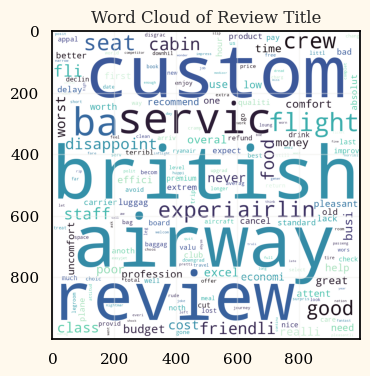

In [165]:
plt.figure(figsize = (9,4))
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10, background_color = 'white',collocations = False, colormap='mako')
cloud = wc.generate(df['title_transform'].str.cat(sep = ' '))
plt.imshow(cloud)
plt.title("Word Cloud of Review Title")